In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from scipy.optimize import minimize
plt.rcParams['figure.figsize'] = [18,12]
plt.rcParams.update({'font.size':18})

In [4]:
# Solve y = Theta*s for "s"
n = 1000 #dimention of s, dim(s)
p = 200 #number of measurements, dim(y)
Theta = np.random.randn(p,n)
y = np.random.randn(p)

# L1 Minimum norm solution s_L1
def L1_norm(x):
    return(np.linalg.norm(x,1))
constr = ({'type':'eq','fun':lambda x: Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y
res = minimize(L1_norm, x0, method = 'SLSQP', constraints=constr)
s_L1 = res.x

In [5]:
# L2 Minimum norm solution s_L2
s_L2 = np.linalg.pinv(Theta) @ y

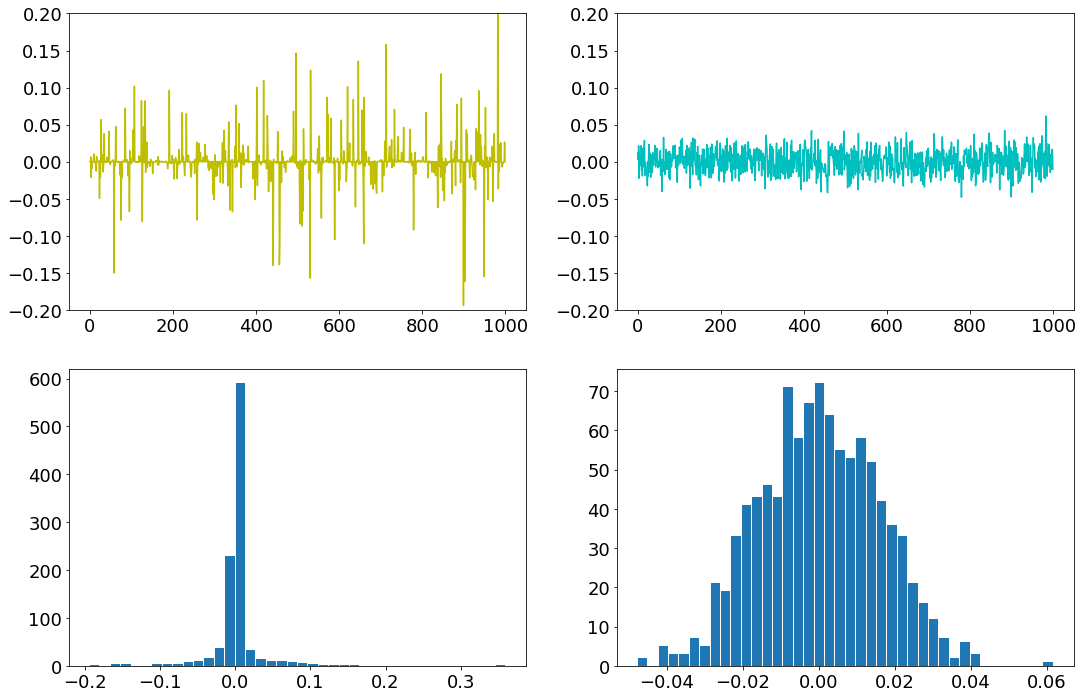

In [25]:
fig,axs = plt.subplots(2,2)
axs[0,0].plot(s_L1,color = 'y', linewidth = 1.5)
axs[0,0].set_ylim(-0.2,0.2)
axs[0,1].plot(s_L2,color = 'c', linewidth = 1.5)
axs[0,1].set_ylim(-0.2,0.2)
axs[1,0].hist(s_L1,bins=40,rwidth=0.9)
axs[1,1].hist(s_L2,bins=40,rwidth=0.9)

plt.show()